In [531]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline  

In [532]:
#import os
#os.getcwd()

In [533]:
#os.chdir("G:\\Project")

In [534]:

df = pd.read_csv('C:/Users/Dell/Downloads/train_u6lujuX_CVtuZ9i.csv')
df_test= pd.read_csv('C:/Users/Dell/Downloads/test_Y3wMUE5_7gLdaTN.csv')

In [535]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


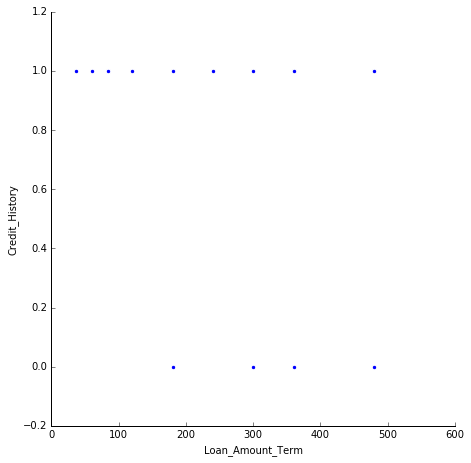

In [536]:
sns.pairplot( df,x_vars='Loan_Amount_Term',y_vars='Credit_History',size=6.5)

In [537]:
df.info()
type(df)
corr = df.corr()
corr.style.background_gradient()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [538]:
df.describe()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


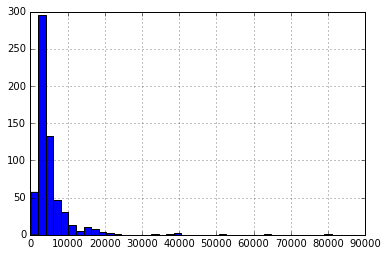

In [539]:
df['ApplicantIncome'].hist(bins=40)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x1b7128626a0>],
 'caps': [<matplotlib.lines.Line2D at 0x1b71286aef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b7128758d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1b712871978>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1b712862f98>,
  <matplotlib.lines.Line2D at 0x1b71286a7f0>]}

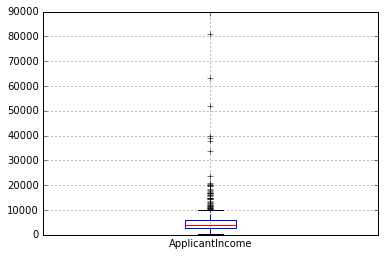

In [540]:
df.boxplot(column = 'ApplicantIncome')


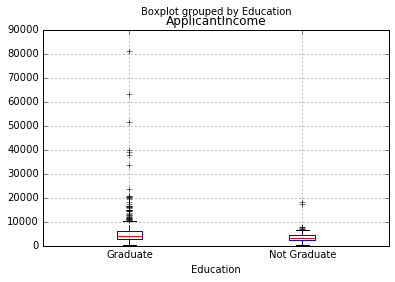

In [541]:
df.boxplot(column='ApplicantIncome', by = 'Education')


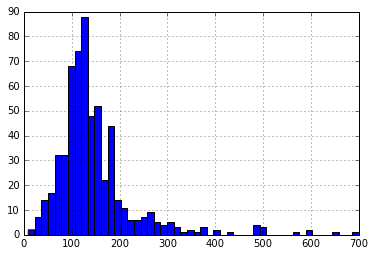

In [542]:
df['LoanAmount'].hist(bins=50)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x1b712a807b8>],
 'caps': [<matplotlib.lines.Line2D at 0x1b712a88a20>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b712a939e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1b712a8ea90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1b712a80940>,
  <matplotlib.lines.Line2D at 0x1b712a88908>]}

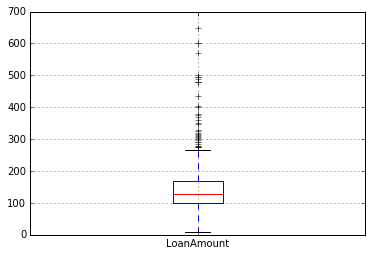

In [543]:
df.boxplot(column ='LoanAmount' )


In [544]:
temp1 = df['Credit_History'].value_counts(ascending= False)

 

In [545]:
temp1

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [546]:
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

In [547]:
temp2

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

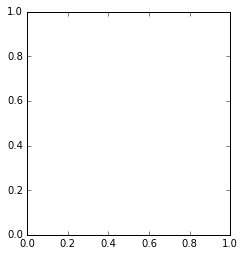

In [548]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)

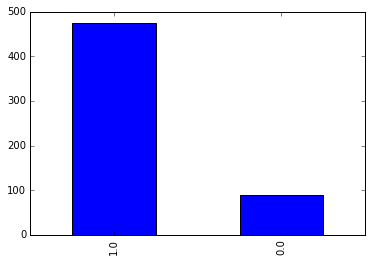

In [549]:
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

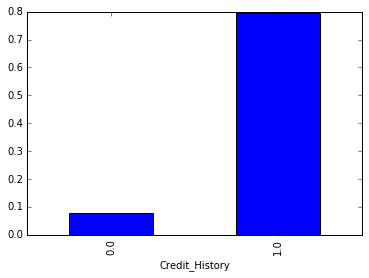

In [550]:
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

In [551]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])


In [552]:
temp3


Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


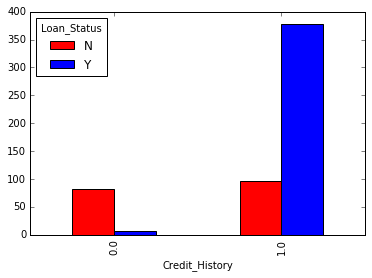

In [553]:
temp3.plot(kind='bar', stacked=False, color=['red','blue'], grid=False)


In [554]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [555]:
df.isnull().sum(axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [556]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=  True)

In [557]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


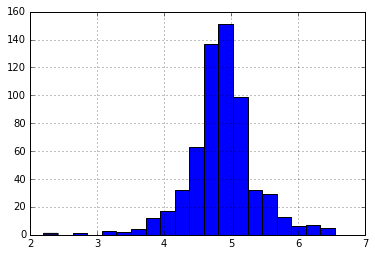

In [558]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [559]:
df['Gender']=pd.get_dummies(df['Gender'],drop_first = True)
df.head(3)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,1.0,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030
1,LP001003,1.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,1.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655


In [560]:
df['Married']= pd.get_dummies(df['Married'],drop_first = True)
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,1.0,0.0,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030
1,LP001003,1.0,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,1.0,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655


In [561]:
df['Education'] = pd.get_dummies(df['Education'],drop_first = True)
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,1.0,0.0,0,0.0,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030
1,LP001003,1.0,1.0,1,0.0,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,1.0,1.0,0,0.0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655


In [562]:
df.drop('Property_Area',axis =1 ,inplace =True)
    

In [563]:
df.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log
0,LP001002,1.0,0.0,0,0.0,No,5849,0.0,128.0,360.0,1.0,Y,4.852030
1,LP001003,1.0,1.0,1,0.0,No,4583,1508.0,128.0,360.0,1.0,N,4.852030
2,LP001005,1.0,1.0,0,0.0,Yes,3000,0.0,66.0,360.0,1.0,Y,4.189655
3,LP001006,1.0,1.0,0,1.0,No,2583,2358.0,120.0,360.0,1.0,Y,4.787492
4,LP001008,1.0,0.0,0,0.0,No,6000,0.0,141.0,360.0,1.0,Y,4.948760


In [564]:
df.info()    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null float64
Married              614 non-null float64
Dependents           599 non-null object
Education            614 non-null float64
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Loan_Status          614 non-null object
LoanAmount_log       614 non-null float64
dtypes: float64(8), int64(1), object(4)
memory usage: 62.4+ KB


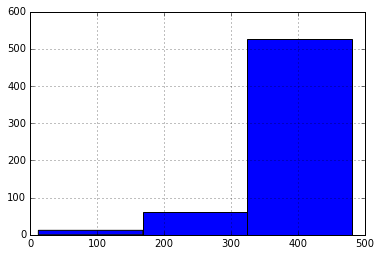

In [565]:
df['Loan_Amount_Term'].hist(bins=3)

In [566]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=  True)
df.head(3)



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log
0,LP001002,1.0,0.0,0,0.0,No,5849,0.0,128.0,360.0,1.0,Y,4.852030
1,LP001003,1.0,1.0,1,0.0,No,4583,1508.0,128.0,360.0,1.0,N,4.852030
2,LP001005,1.0,1.0,0,0.0,Yes,3000,0.0,66.0,360.0,1.0,Y,4.189655


In [567]:
df.drop(['Loan_ID','Dependents'],axis = 1,inplace = True)


In [568]:
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender               614 non-null float64
Married              614 non-null float64
Education            614 non-null float64
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       564 non-null float64
Loan_Status          614 non-null object
LoanAmount_log       614 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 52.8+ KB


In [569]:
df.isnull().sum(axis = 0)

Gender                0
Married               0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Loan_Status           0
LoanAmount_log        0
dtype: int64

In [570]:
df['Credit_History'].fillna( df['Loan_Status'],inplace= True)

In [571]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Y       37
N       13
Name: Credit_History, dtype: int64

In [572]:
def credit_his(k):
    if k == 'Y':
        return 1
    elif k == 'N':
        return 0
    else:
        return k

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender               614 non-null float64
Married              614 non-null float64
Education            614 non-null float64
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null object
Loan_Status          614 non-null object
LoanAmount_log       614 non-null float64
dtypes: float64(7), int64(1), object(3)
memory usage: 52.8+ KB


In [573]:
df['Credit_History']=df['Credit_History'].apply(credit_his)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender               614 non-null float64
Married              614 non-null float64
Education            614 non-null float64
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Loan_Status          614 non-null object
LoanAmount_log       614 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 52.8+ KB


In [574]:
df['Credit_History'].value_counts()


1.0    512
0.0    102
Name: Credit_History, dtype: int64

In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender               614 non-null float64
Married              614 non-null float64
Education            614 non-null float64
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Loan_Status          614 non-null object
LoanAmount_log       614 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 52.8+ KB


In [576]:
def emplyed(j):
    if j == 'Yes':
        return 1
    if j == 'No':
        return 0

In [577]:
df['Self_Employed']=df['Self_Employed'].apply(emplyed)  
df['Self_Employed'].value_counts()


0.0    500
1.0     82
Name: Self_Employed, dtype: int64

In [578]:
df['Self_Employed'].fillna( df['Credit_History'],inplace= True)

In [579]:
df['Self_Employed'].value_counts()

0.0    506
1.0    108
Name: Self_Employed, dtype: int64

In [580]:
def loan(x):
    if x == 'Y':
        return 1
    if x == 'N':
        return 0
    
    

In [581]:
df['Loan_Status']=df['Loan_Status'].apply(loan)  


In [582]:
df.head(3) 

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log
0,1.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,1,4.852030
1,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0,4.852030
2,1.0,1.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,1,4.189655


In [583]:
df.head(5) 


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log
0,1.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,1,4.852030
1,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0,4.852030
2,1.0,1.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,1,4.189655
3,1.0,1.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,1,4.787492
4,1.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,1,4.948760


In [584]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status'] 



In [585]:
df.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'LoanAmount_log'],
      dtype='object')

In [586]:
from sklearn.cross_validation import train_test_split
 


In [587]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)


In [588]:
 from sklearn.linear_model import LogisticRegression


In [589]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [590]:
predictions_train=logmodel.predict(X_train) 

In [591]:
predictions=logmodel.predict(X_test) 

In [592]:
from sklearn.metrics import classification_report


In [593]:
print(classification_report(y_train,predictions_train))

             precision    recall  f1-score   support

          0       0.93      0.52      0.67       128
          1       0.83      0.98      0.90       301

avg / total       0.86      0.85      0.83       429



In [594]:
print(classification_report(y_test,predictions))


             precision    recall  f1-score   support

          0       0.94      0.45      0.61        64
          1       0.77      0.98      0.87       121

avg / total       0.83      0.80      0.78       185



In [595]:
from sklearn.metrics import confusion_matrix


In [596]:
print(confusion_matrix(y_test,predictions))


[[ 29  35]
 [  2 119]]


In [597]:
(34+109)/ (35+26+109)

0.8411764705882353

In [598]:
logmodel.score(X_test, y_test)

0.80000000000000004

In [599]:
logmodel.score(X_train, y_train)

0.84615384615384615

In [600]:
# test
df_test.isnull().sum(axis = 0)


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [601]:
df_test['LoanAmount'].fillna(df_test['LoanAmount'].median(), inplace=  True)
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])
df_test['Gender']=pd.get_dummies(df_test['Gender'],drop_first = True)
df_test['Married']= pd.get_dummies(df_test['Married'],drop_first = True)
df_test['Education'] = pd.get_dummies(df_test['Education'],drop_first = True)
df_test.drop('Property_Area',axis =1 ,inplace =True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].median(), inplace=  True)
df_test['Self_Employed'].fillna( df['Credit_History'],inplace= True)
df['Self_Employed']=df['Self_Employed'].apply(emplyed)  
loan_id_test = df_test['Loan_ID']
df_test.drop(['Loan_ID','Dependents'],axis = 1,inplace = True)
df_test.isnull().sum(axis = 0)

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
LoanAmount_log        0
dtype: int64

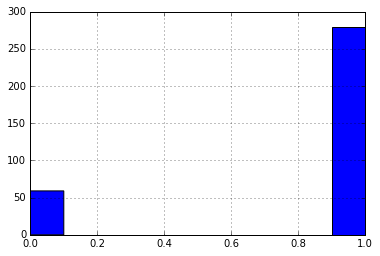

In [602]:
df_test['Credit_History'].hist()

In [603]:
df_test['Credit_History'].fillna(1.0, inplace=True)


In [604]:
df_test.isnull().sum(axis = 0)


Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
LoanAmount_log       0
dtype: int64

In [605]:
predictions_test=logmodel.predict(df_test)

ValueError: could not convert string to float: 'Yes'

In [ ]:
#Now using Gradient Boosting
#from sklearn.ensemble import GradientBoostingClassifier
#clf=GradientBoostingClassifier(n_estimators=100,max_depth=1)
#clf.fit(X_train,y_train)


In [ ]:
#clf.score(X_test, y_test)

In [ ]:
#from sklearn.ensemble import  RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
#rfc=  RandomForestClassifier(n_estimators=100)
#rfc.fit(X_train,y_train)
#rfc.score(X_test, y_test)

In [ ]:
#Bagging
#bg=BaggingClassifier(n_estimators=100)
#bg.fit(X_train,y_train)
#bg.score(X_test, y_test)

In [ ]:
#adb=AdaBoostClassifier(n_estimators=100)
#adb.fit(X_train,y_train)
#adb.score(X_test, y_test)

In [ ]:
##df.sex=df.sex.map({'female':1,'male':0})
 


In [ ]:
df_result= pd.DataFrame()

df_result['Loan_ID']= loan_id_test
df_result['Loan_Status']= predictions_test 

df_result.head(5)

In [ ]:
def loan_test(x):
    if x == 1:
        return 'Y'
    if x == 0:
        return 'N'
    
    
df_result['Loan_Status'].apply(loan_test)

In [ ]:
pd.DataFrame.to_csv(df_result,"filename4.csv",index=False)
